<a href="https://colab.research.google.com/github/Srividhyak2011/Demo-Datascienceproject/blob/main/M6_MP1_NB_Advertisement_CTR_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Module 6 Mini Project: Advertisemnt click-through-rate Optimisation.

## Learning Objectives

At the end of the mini project, you will be able to -

* Applying various Multi armed bandit algorithms for exploration and exploitation.
* Comparison of UCB and Thompson sampling on Ads CTR (clicl-through-rate) optimisation problem.
* Optimising advertisements click-through-rate.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import random
import math

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 7

from IPython.display import Image

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#@title Download dataset
%%capture
!wget https://cdn.extras.talentsprint.com/ADSMI/Datasets/Ads_CTR_Optimisation.zip
!unzip "Ads_CTR_Optimisation.zip"

## Importing the dataset

In [30]:
# Load the dataset
data = pd.read_csv('Ads_CTR_Optimisation.csv', nrows=100000)

data.shape

(10000, 10)

In [31]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [37]:
import pandas as pd

# Create an empty DataFrame
df = pd.DataFrame(columns=['Arm', 'True_Reward'])

# Use a for loop to insert records into the DataFrame
for i in range(1,11,1):
    ct = 'Ad' + " " + str(i)
    num_arms = 1
    mean_reward = data[ct].mean()
    std_dev = data[ct].std()
    data_to_insert = [
    {'Arm': ct, 'True_Reward': np.random.normal(mean_reward, std_dev, num_arms)}
    ]
    df = df.append(data_to_insert, ignore_index=True)

# Display the DataFrame with inserted records
print(df)

     Arm             True_Reward
0   Ad 1   [-0.4630233279785584]
1   Ad 2   [-0.2513976164167369]
2   Ad 3    [0.3262578873501081]
3   Ad 4     [0.794203928933687]
4   Ad 5    [0.6750553675427395]
5   Ad 6   [0.05979140952766918]
6   Ad 7  [-0.01883158099984411]
7   Ad 8  [-0.18954428562368564]
8   Ad 9   [0.19868578831034853]
9  Ad 10   [0.03798866633278304]


<ipython-input-37-f6c68085afb3>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_insert, ignore_index=True)
<ipython-input-37-f6c68085afb3>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_insert, ignore_index=True)
<ipython-input-37-f6c68085afb3>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_insert, ignore_index=True)
<ipython-input-37-f6c68085afb3>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_insert, ignore_index=True)
<ipython-input-37-f6c68085afb3>:15: FutureWarning: The frame.append method is deprecated and will be removed from pa

## Implementing Random Selection (1 point)

* randomly pick arms(ads) using $random$ library
* Sum the reward after every selection

In [38]:
# Select arms randomly and summarise the rewards
import pandas as pd
import random

# Create a data frame with information about each arm (ad)

# Number of rounds or selections
num_rounds = 1000

# Variable to keep track of the total reward
total_reward = 0

# Simulating the bandit problem
for _ in range(num_rounds):
    # Randomly select an arm
    selected_arm = random.choice(df['Arm'])

    # Get the true reward for the selected arm
    reward = df.loc[df['Arm'] == selected_arm, 'True_Reward'].values[0]

    # Sum up the reward
    total_reward += reward

# Print the total reward
print(f"Total Reward after {num_rounds} rounds: {total_reward}")

Total Reward after 1000 rounds: [108.58371624]


## Plot the results of random selection (1 Point )

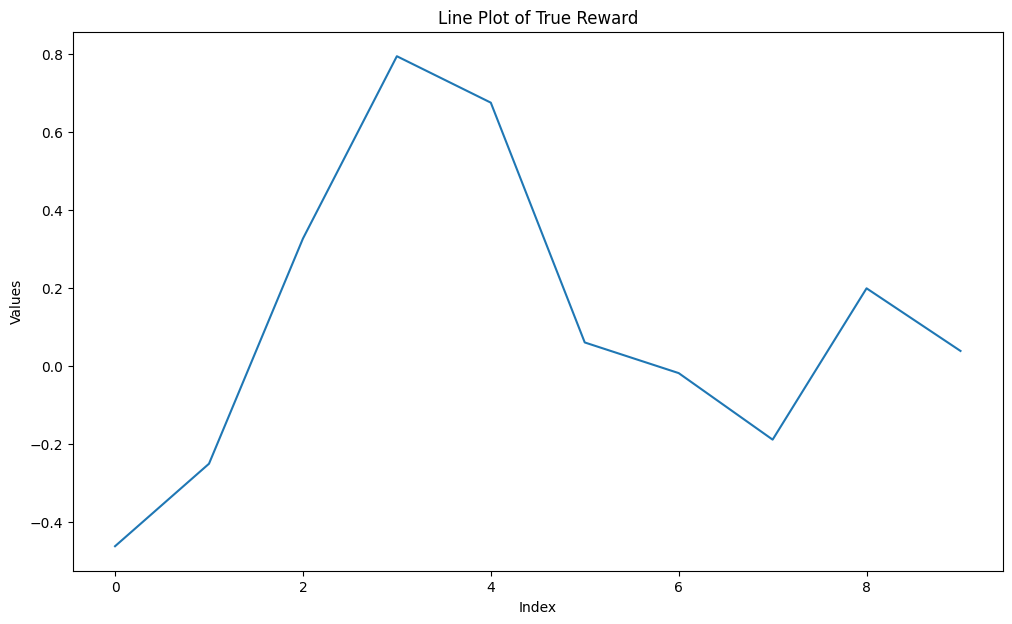

In [45]:
# Visualising the results
import numpy as np
import matplotlib.pyplot as plt

# Sample true_rewards
plt.plot(df['True_Reward'])
plt.title('Line Plot of True Reward')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

In [55]:
# Print number of times each arm is selected
for i in range(1,11,1):
    ct = 'Ad' + " " + str(i)
    target_value = 1
    arm_counts = data[ct].value_counts().get(target_value, 0)
    print(ct + "  =  " + str(arm_counts))



Ad 1  =  1703
Ad 2  =  1295
Ad 3  =  728
Ad 4  =  1196
Ad 5  =  2695
Ad 6  =  126
Ad 7  =  1112
Ad 8  =  2091
Ad 9  =  952
Ad 10  =  489


# Implement Upper Confidence Bound (UCB)


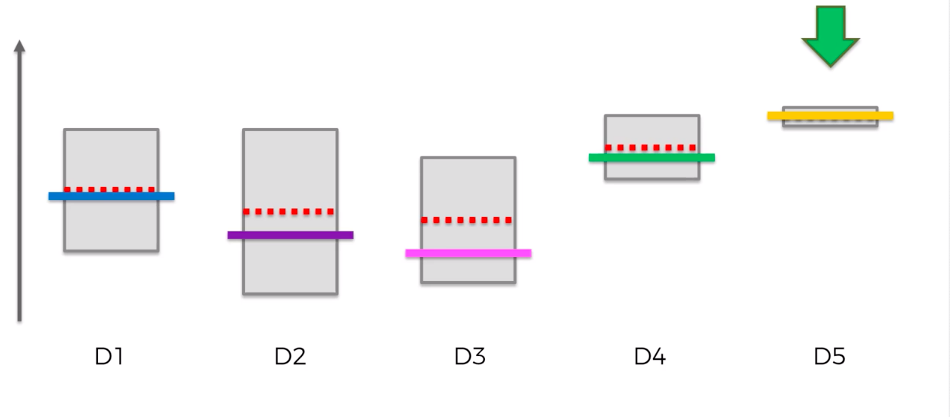

In [ ]:
#@title Upper confidence bound
Image(filename='UCB_Algorithm_Slide_1.png')

The algorithm starts with an initial expecte value. Then, select a column and exploit it one time. The expected value might go down or up as new observation is taken. As there are more observations, the confidence bound gets smaller as the algorithm is more confident in the result. Then, select the column with the hiest upper confidence bound and exploit it once, which also makes the bound gets smaller and shifts the observation. Repeat these steps until the algorithm consistently exploits the same column, which is an indicator that this column is the optimal model.

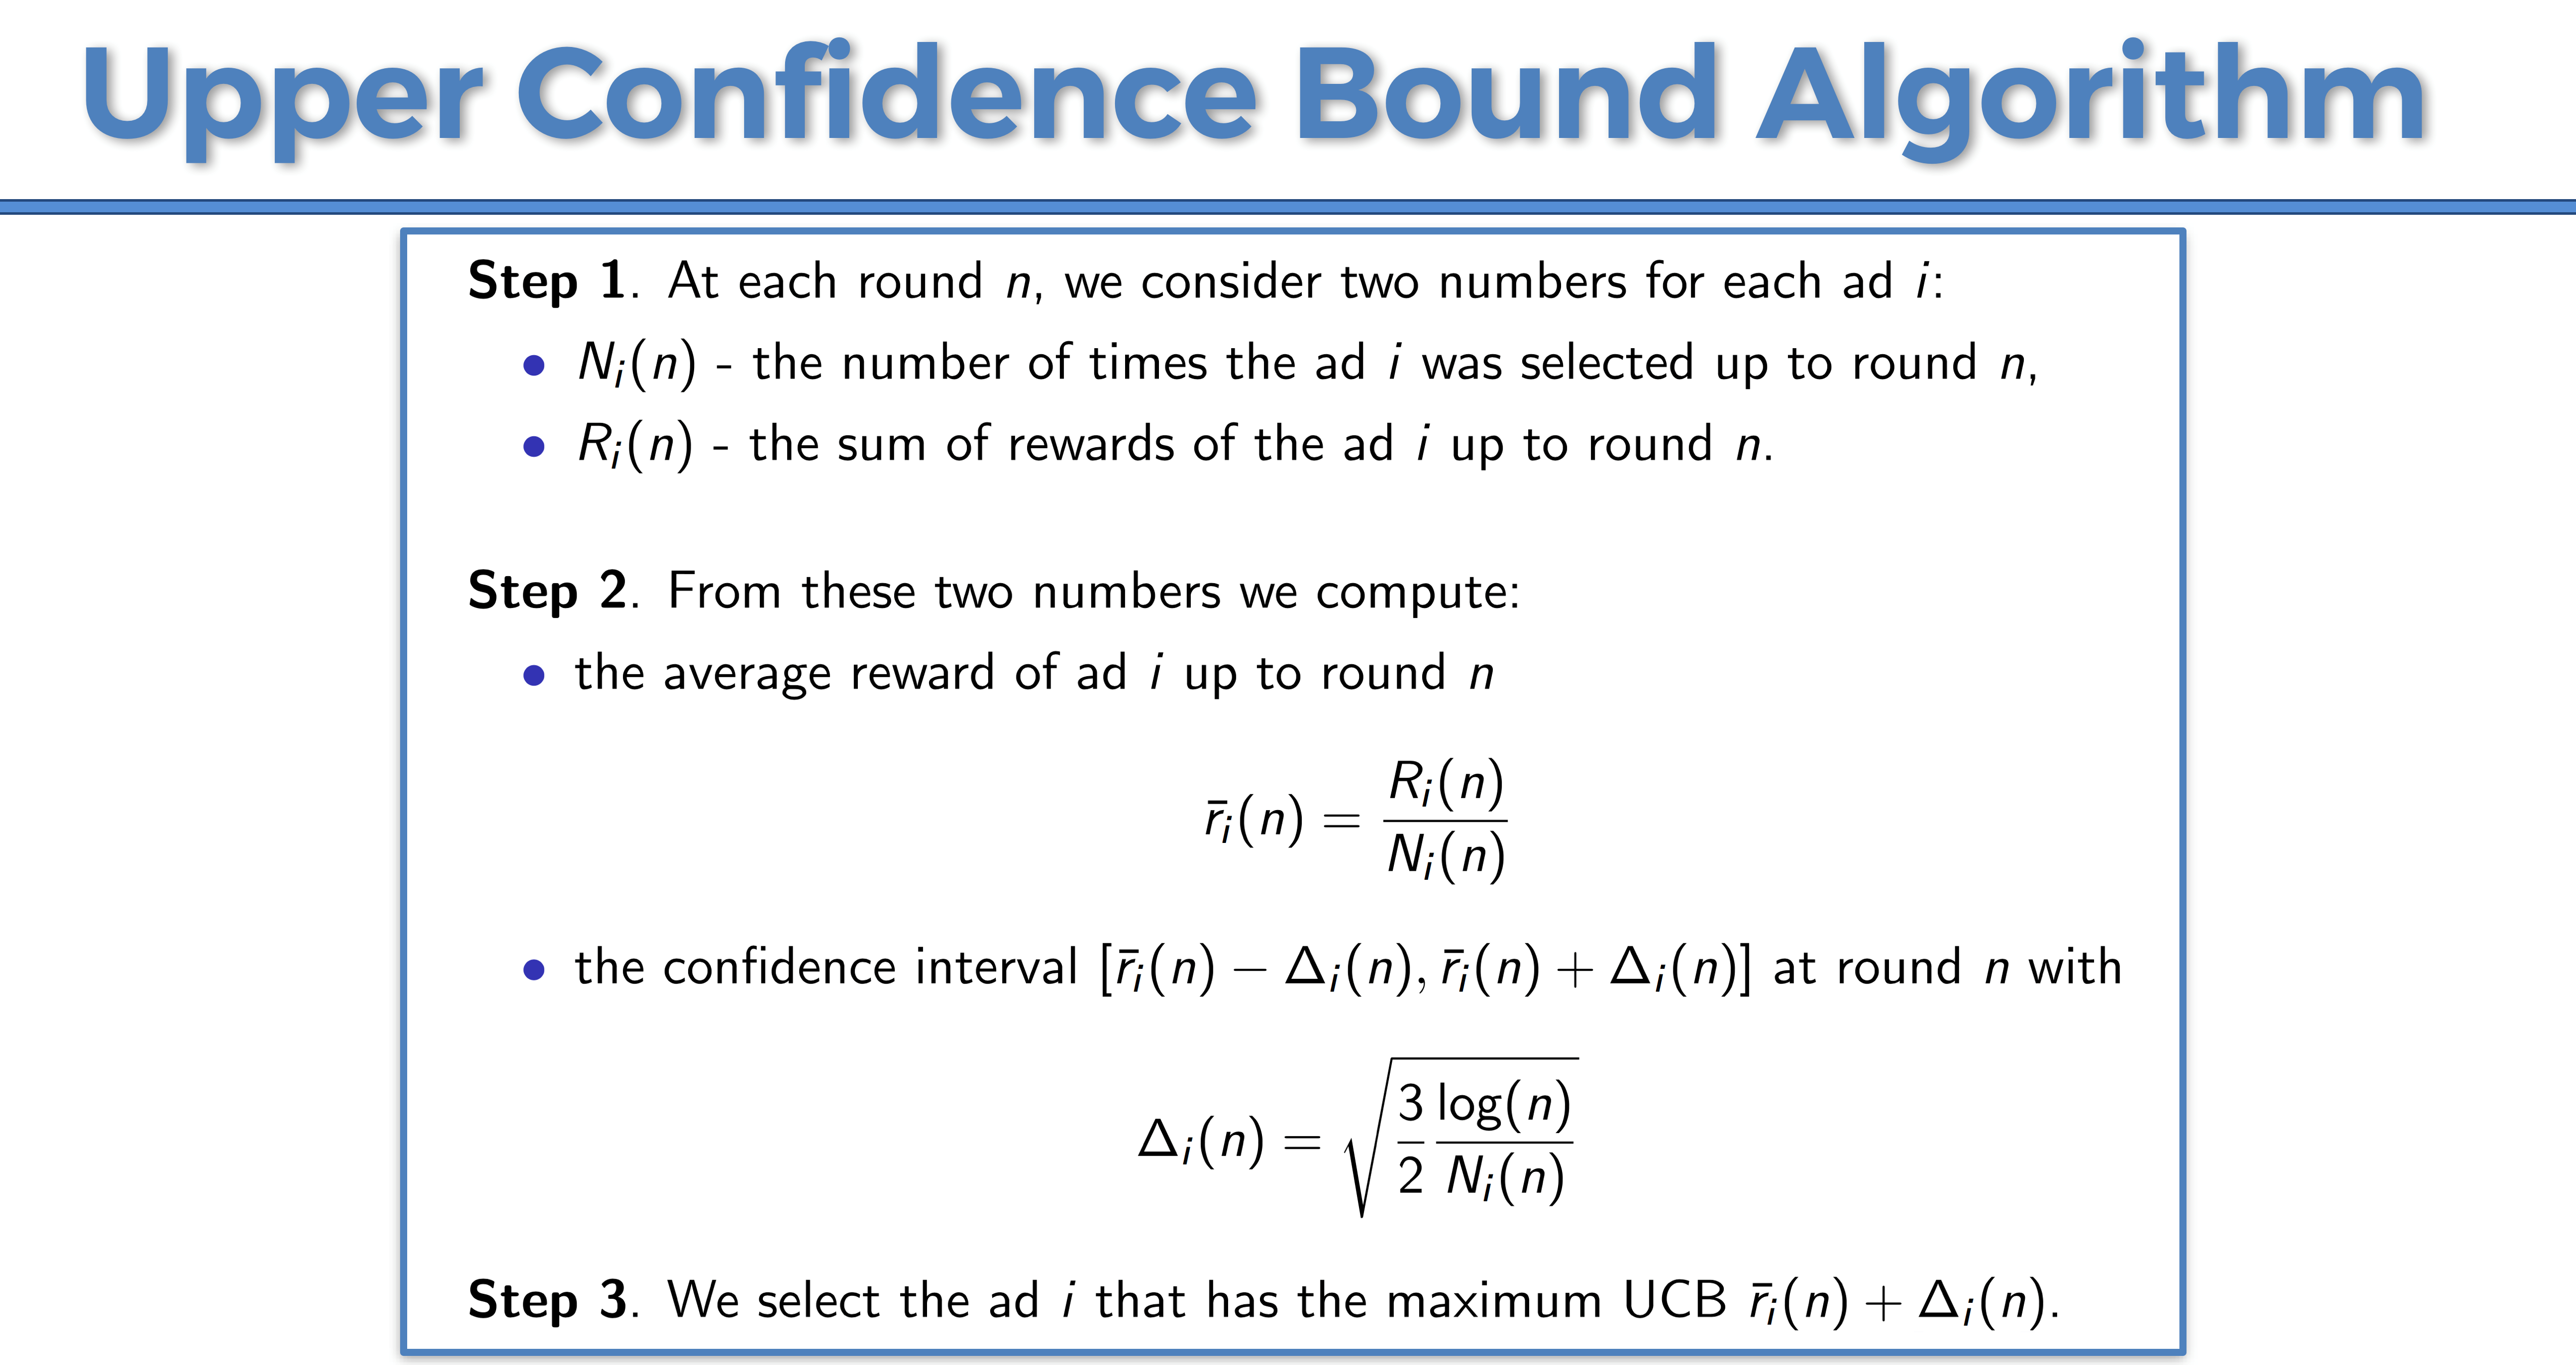

In [ ]:
#@title Steps in UCB algorithm
Image(filename='UCB_Algorithm_Slide_2.png')

### Upper Confidence Bound (2 points )

* Define number of arms
* Run the steps for specified number of times
* Update the upper bound
* Sum the reward after every trail



In [ ]:
# Implement above steps of UCB algorithm
# YOUR CODE HERE

### Plot the number of times each Advertisement selected using UCB algorithm (1 point )

In [ ]:
# Visualising the results of UCB
# YOUR CODE HERE

In [ ]:
# Print number of times each advertisement is selected by UCB
# YOUR CODE HERE

### Implementing Thompson/Posterior Sampling (2 points )

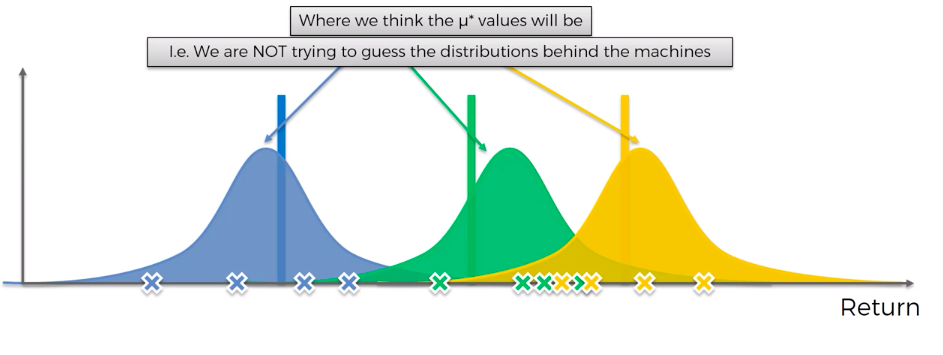

In [ ]:
#@title Thompson sampling

Image(filename='Thompson_Sampling_Slide_1.png')

In Thomson Sampling, we are trying to guess the expected value for each distribution (which would be a bandit). Therefore, this is a probabilistic algorithm. According to initial distributions created, we then generate three random points from each distribution (creating a bandit configuration, which is sampling)

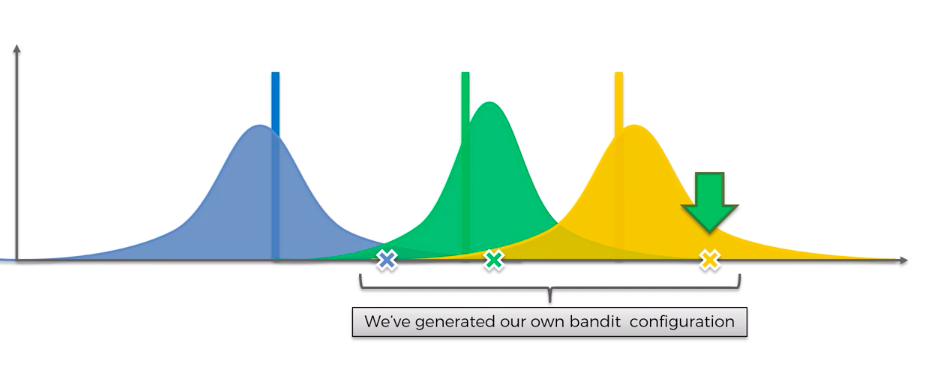

In [ ]:
# from IPython.display import Image
Image(filename='Thompson_Sampling_Slide_2.png')

Then, pick the best point which is the point that is on the far right side of the plot, as it has the highest return. Calculate it on the existing distribution and adjust the expected value and refine the distribution according to this. After iterating these steps many times, the graph will look like this:

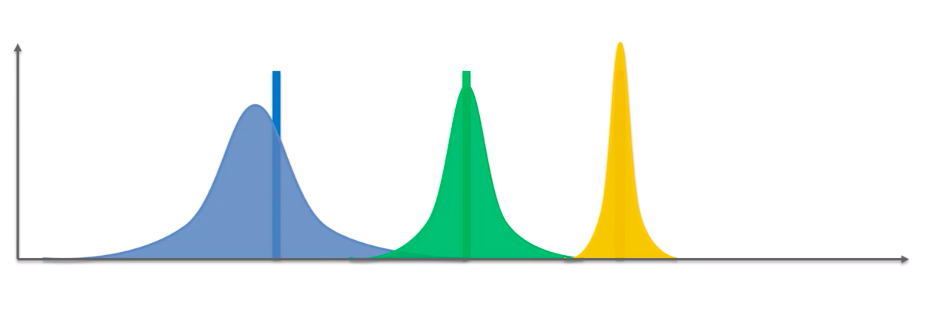

In [ ]:
#@title Image
Image(filename='Thompson_Sampling_Slide_3.png')

The distributions are refined because of more observations present.

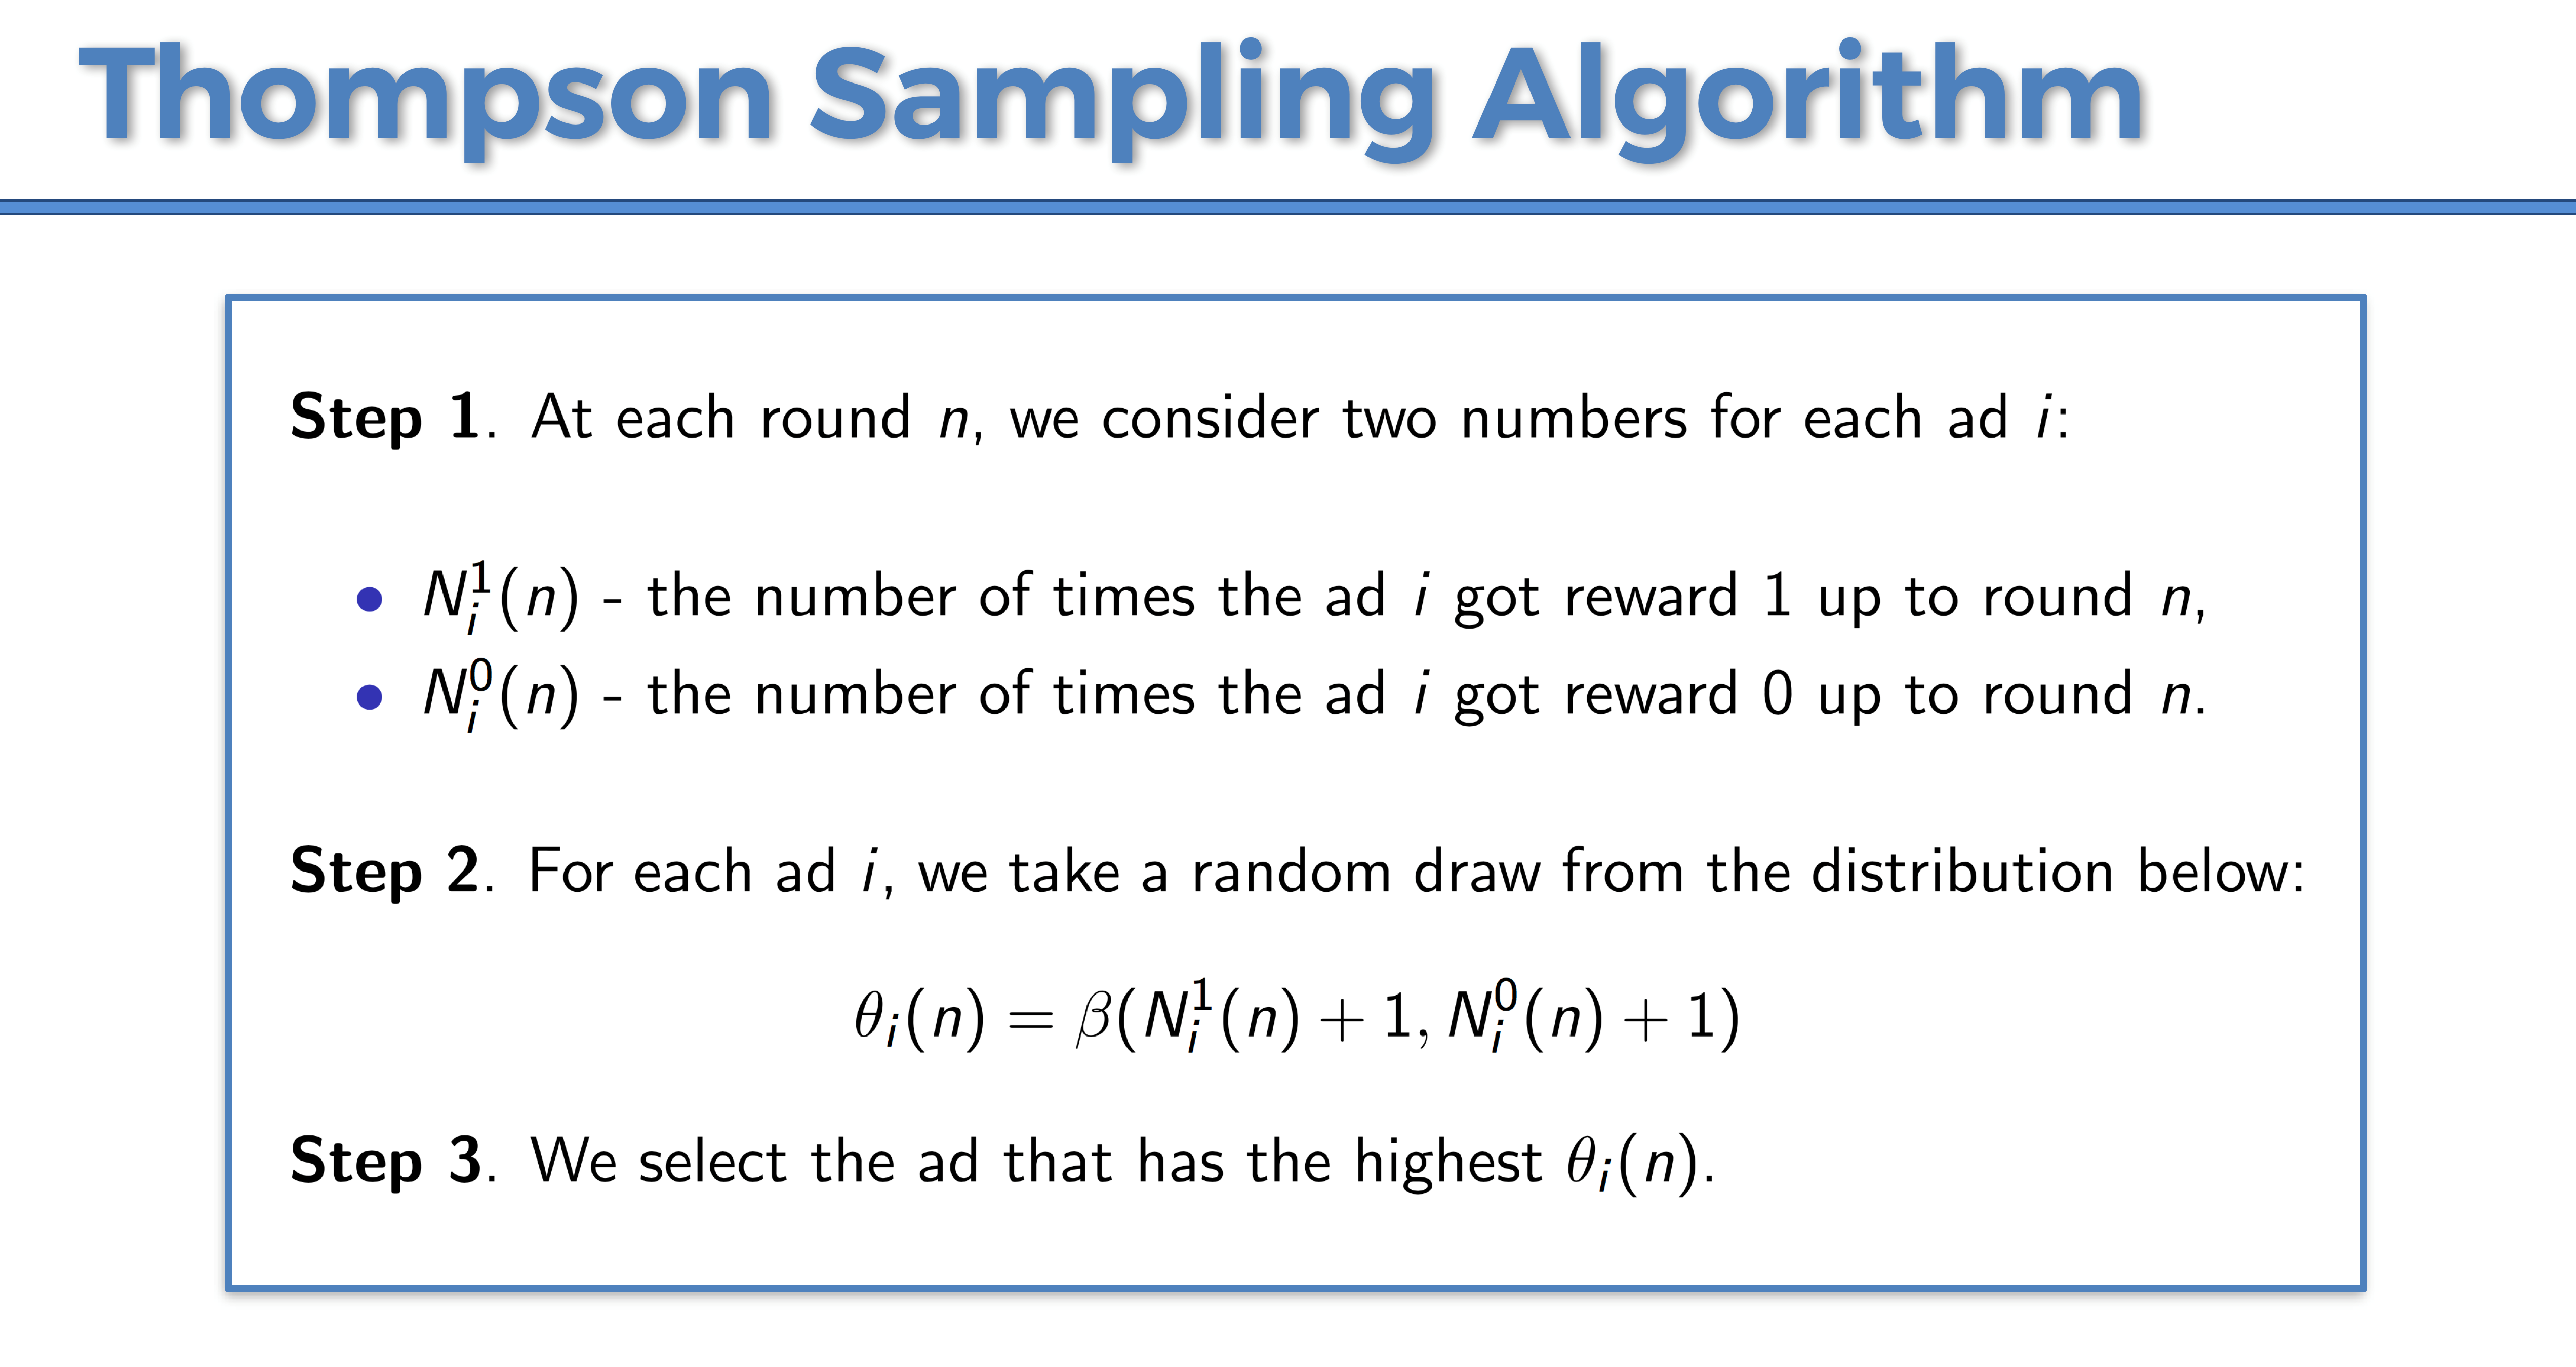

In [ ]:
#@title Steps of Thompson Sampling algorithm
Image(filename='Thompson_Sampling_Slide_4.png')

In [ ]:
# Implementing thompson sampling algorithm
# YOUR CODE HERE

### Plot the numberof times each Advertisement selected using Thompson sampling (1 point )

In [ ]:
# Visualising the results
# YOUR CODE HERE

In [ ]:
# Print number of times each advertisement is selected using Thompson sampling
# YOUR CODE HERE

### Comparison of UCB & Thompson Sampling (2 points)

Summarise the findings here

